In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (8, 5)


In [8]:
import pandas as pd

df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.columns.tolist()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [11]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [12]:
df = df.drop("Id", axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


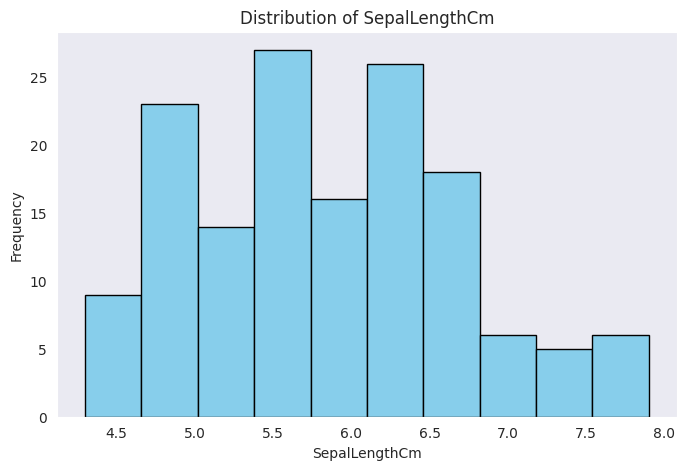

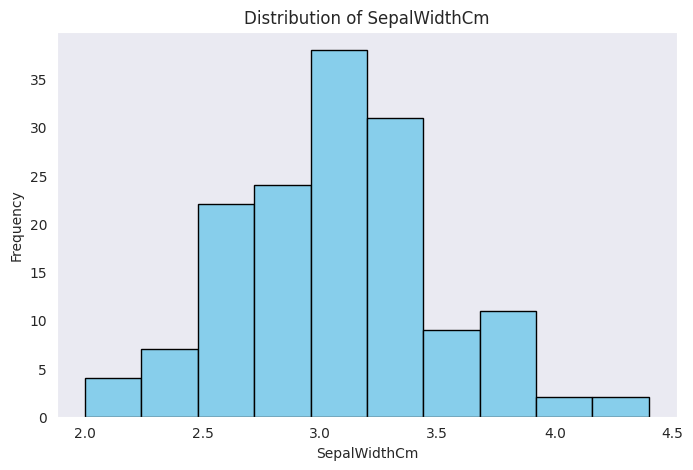

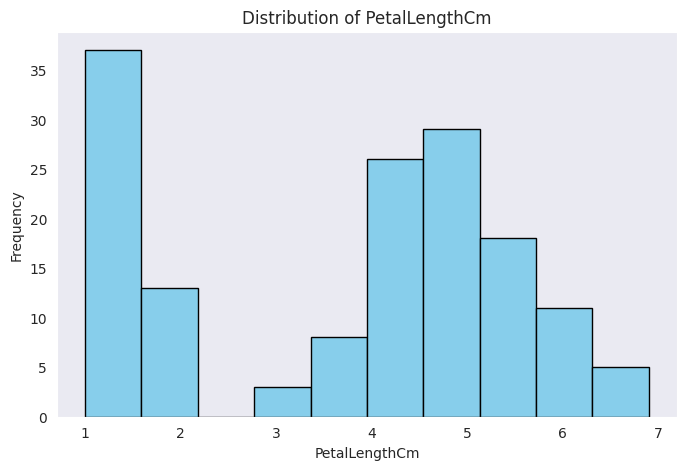

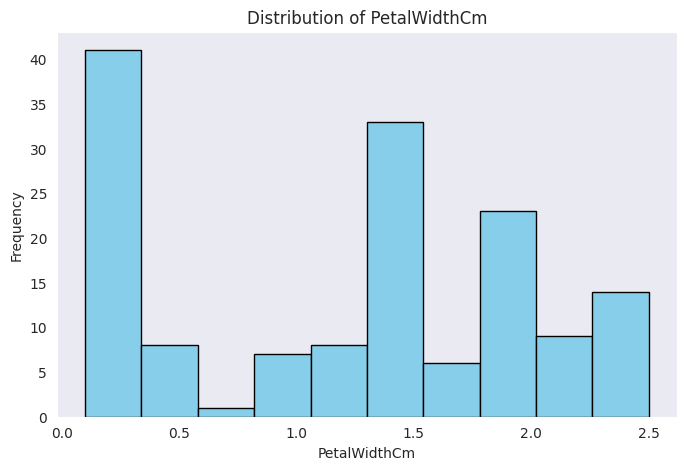

In [13]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for feature in features:
    plt.figure()
    df[feature].hist(color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

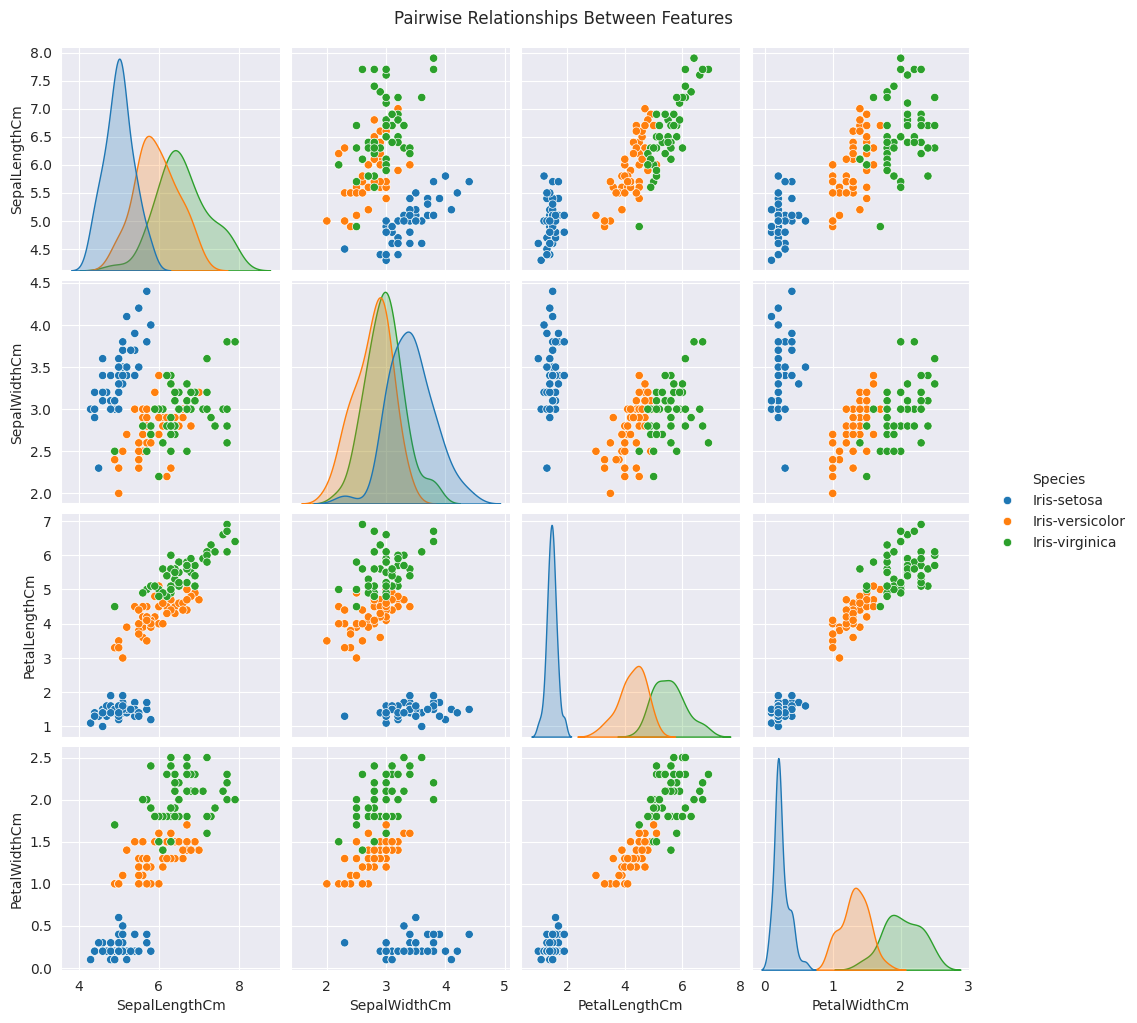

In [14]:
sns.pairplot(df, hue='Species', height=2.5)
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

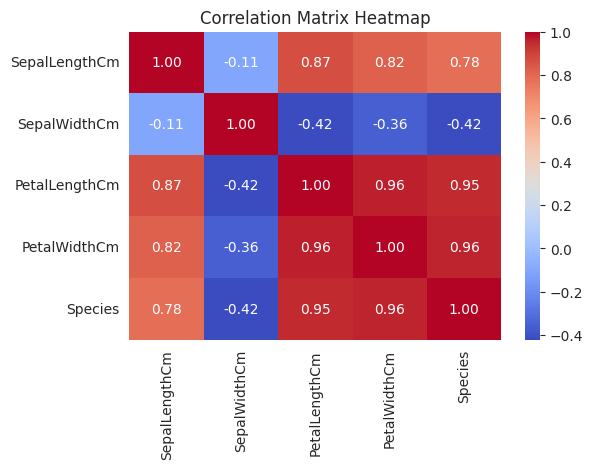

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
correlation_matrix = df.corr()
correlation_matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [18]:
X = df.drop("Species", axis=1)

y = df["Species"]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [22]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

Logistic Regression Accuracy: 100.0 %
KNN Accuracy: 100.0 %
Decision Tree Accuracy: 100.0 %


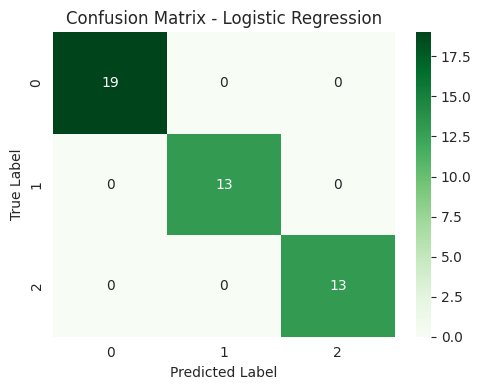

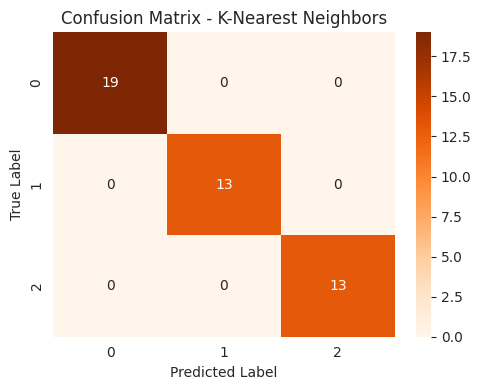

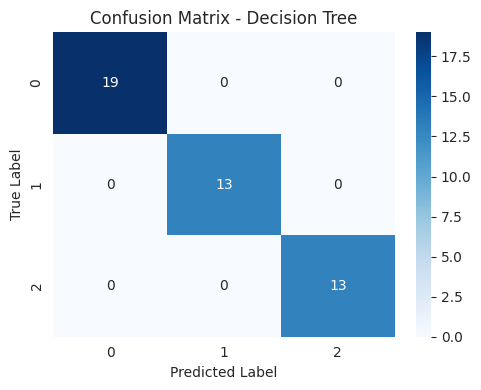

Classification Report - Logistic Regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Classification Report - KNN
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Classification Report - Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1    

In [25]:
log_pred = log_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
tree_pred = tree_model.predict(X_test)

print("Logistic Regression Accuracy:", round(log_model.score(X_test, y_test) * 100, 2), "%")
print("KNN Accuracy:", round(knn_model.score(X_test, y_test) * 100, 2), "%")
print("Decision Tree Accuracy:", round(tree_model.score(X_test, y_test) * 100, 2), "%")

def plot_conf_matrix(name, y_true, y_pred, cmap):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

plot_conf_matrix("Logistic Regression", y_test, log_pred, "Greens")
plot_conf_matrix("K-Nearest Neighbors", y_test, knn_pred, "Oranges")
plot_conf_matrix("Decision Tree", y_test, tree_pred, "Blues")

print("Classification Report - Logistic Regression\n", classification_report(y_test, log_pred))
print("Classification Report - KNN\n", classification_report(y_test, knn_pred))
print("Classification Report - Decision Tree\n", classification_report(y_test, tree_pred))